<p style="text-align:right;">Mario Stanke, University of Greifswald, Germany</p>

# Exercise Set 2, Exercise 1 - Regression Neural Network

This is a copy of notebook ```nn-regr.ipynb``` for solving the following exercises:

  0. Run all cells.  
   
  1. Replace the sigmoid activation function with the **ReLU** function and observe how the shape of the predicted curve changes. *Revert back* afterwards to the *sigmoid* activation function.
   
  2. **Shift** the simulated data on the **x**-axis by **+50**.  
    
    2.1. **For the mathematically inclined:** Let $x' := x + 50$. Show or argue that it theoretically does not matter if you shift (use input $x'$) or not (use $x$):  *For any neural net $f(x)$ there is a neural net $f'(x')$ such that $f'(x') = f(x)$*. You may assume that $n=1$.
    
    2.2. Go to ADD YOUR CODE HERE and follow the instructions. Run all cells. What happens to the goodness of the fit? Do you have an explanation? Tip: Compute the net activations of the first layer manually right before training starts.

## Generate an Artificial Dataset

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense

tf.keras.backend.set_floatx('float64') # floating point precision 64 bits

In [2]:
def f(x):
    '''A simple one-dimensional function with a few extrema'''
    return np.sin(15 * x) + 9 * x - 9 * x**2

#### Simulate $(x, y)$ pairs as artificial data set

In [3]:
np.random.seed(1)
m = 100 # number of data points (examples)
x = np.linspace(0, 1, m) # equidistant in [0,1] (both boundaries included)
y_theoretical = f(x)     # the points on the curve
# ADD YOUR CODE HERE to shift x by +50, 1 line
x = x + 50
# YOUR CODE ENDS
sigma = 0.1
y = y_theoretical + sigma * np.random.randn(m) # observations have noise (normal with mean 0 and variance sigma^2 = 0.01)

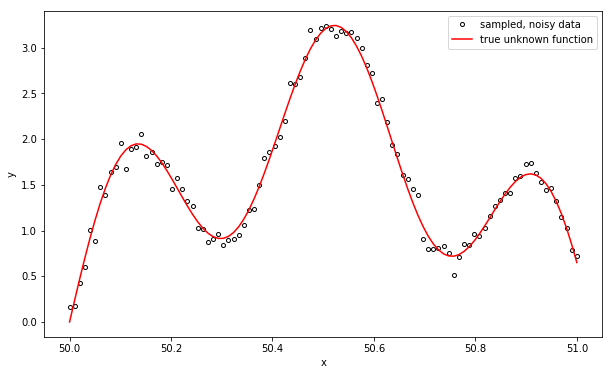

In [4]:
def plot_curve():
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.plot(x, y, 'ko', fillstyle = 'none', markersize = 4, label = "sampled, noisy data") # ko: blac(k) circle
    ax.plot(x, y_theoretical, 'r', label = "true unknown function")
    plt.xlabel("x")
    plt.ylabel("y")
    return ax

ax = plot_curve()
ax.legend();

## Create Neural Network Model  
We will use [```tf.keras```](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras), a high-level approach to neural network design and learning. The NN shall have 2 hidden layers with 8 neurons each. As activation functions we chose the logistic sigmoid function $\sigma$.

<img src="nn8-8.png" alt="network architecture" width="500"/>

In [5]:
np.random.seed(1) # so we all get the same pseudorandom results

# a neural network is a stack of layers, in keras called "Sequential" model
model = tf.keras.models.Sequential() # so far the stack is empty, 0 layers

# add neural network layers one by one
# Dense is a fully connected layer, parametrized by a matrix of shape (input_units, output_units).
# The first number given in Dense is the number of output units, the number of input units is implicit.
# By default use_bias=True which adds output_units parameters for each layer
# REPLACE THE ACTIVATION FUNCTION HERE with tf.nn.relu
model.add(Dense(8, activation = tf.nn.sigmoid, input_dim = 1)) # input dimension only required for first layer
model.add(Dense(8, activation = tf.nn.sigmoid))
# YOUR CHANGES END HERE
model.add(Dense(1))

model.summary()     # summarizes layers and parameters
model.get_weights() # a look under the 'hood' for teaching purposes

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


[array([[-0.42670672, -0.38459982, -0.60640768,  0.1298427 , -0.79778874,
          0.58971129, -0.07932943,  0.0540472 ]]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[-0.21802117,  0.47657749, -0.28045094,  0.56651265, -0.50329894,
          0.15897265, -0.01629053, -0.25547111],
        [ 0.08752405,  0.32804593,  0.57949577, -0.29776427,  0.15197492,
         -0.09089084, -0.08418708,  0.15597089],
        [ 0.45934427,  0.32803993, -0.01953689,  0.55395122,  0.38862042,
         -0.05664105,  0.14281353,  0.23706711],
        [ 0.40684773, -0.04892687, -0.2359832 ,  0.17645743, -0.00406915,
         -0.07553819,  0.32724773, -0.56313617],
        [-0.4536553 , -0.2330421 ,  0.25923625, -0.07456593,  0.2800743 ,
          0.454285  , -0.37720049,  0.03990796],
        [ 0.41137347,  0.11647058,  0.46801051,  0.16488626, -0.40267965,
          0.47523623,  0.45673506,  0.08965288],
        [ 0.5736837 ,  0.34214139, -0.06204252,  0.48808015, -0.00112767,
          0.59553609,

The weights are randomly initializated. This is important (why?) as can be the parameters of the distribution. We postpone parameter initialization to the next notebook.

### Compile the model

In [6]:
# define the loss, optimization algorithm and prepare the model for gradient computation 
opti = tf.keras.optimizers.Adam(learning_rate = 0.01) # Adam is a popular method for stochastic gradient descent
model.compile(optimizer = opti, loss = 'mse') # mean squared error

### Train the parameters (learning)

In [7]:
# execute the actual training 
history = model.fit(x, y, epochs=3000, verbose=0) # takes ~20s
# verbose = 1,2 gives more output

### Examine the learning progress

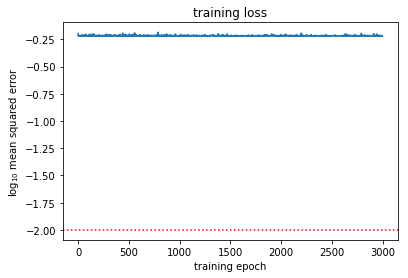

In [8]:
plt.plot(np.log10(history.history["loss"])); # one mse value per epoch
plt.title("training loss")
plt.xlabel("training epoch")
plt.ylabel(r"$\log_{10}$ mean squared error");
plt.axhline(y = np.log10(sigma**2), color = "red", linestyle = ":");

Observe that with our choice for the measurement noise the theoretical optimum for the mean squared error *on new data* is $10^{-2}$ (red dotted line).
### Use the model for predictions

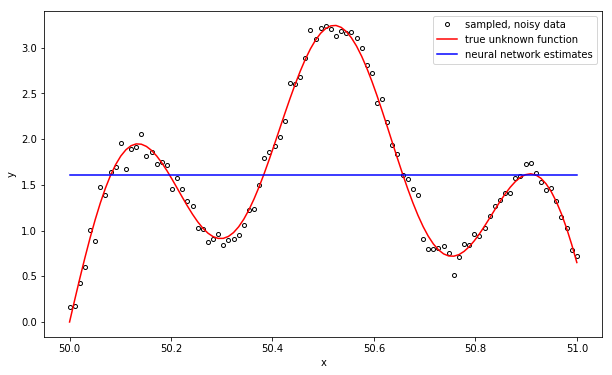

In [9]:
x_input = x.reshape((-1, 1)) # make x a matrix (with 1 column) as expected by predict
y_pred = model.predict(x_input)

ax = plot_curve()
ax.plot(x, y_pred, 'b', label = "neural network estimates") # (b)lue
ax.legend();